# **Clasificatiemodellen in machine learning**

## **Bibliotheken importeren**

In [3]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

## **Data inlezen**

**connectie**

In [4]:
go_sales_con = sqlite3.connect('Great_Outdoors_Data_SQLite\go_sales.sqlite')
go_crm_con = sqlite3.connect('Great_Outdoors_Data_SQLite\go_crm.sqlite')
go_staff_con = sqlite3.connect('Great_Outdoors_Data_SQLite\go_staff.sqlite')
go_inv_con = 'Great_Outdoors_Data_SQLite\GO_SALES_INVENTORY_LEVELSData.csv'
go_forecast_con = 'Great_Outdoors_Data_SQLite\GO_SALES_PRODUCT_FORECASTData.csv'

**Dataframes inlezen**

In [5]:
Go_staff_queries = {
    'Course': 'SELECT * FROM Course',
    'Training': 'SELECT * FROM Training',
    'Sales_staff': 'SELECT * FROM Sales_staff',
    'Satisfaction': 'SELECT * FROM Satisfaction',
    'Satisfaction_type': 'SELECT * FROM Satisfaction_type',
}

Go_crm_queries = {
    'Retailer_contact': 'SELECT * FROM Retailer_contact',
    'Retailer_site' : 'SELECT * FROM Retailer_site',
    'Retailer' : 'SELECT * FROM Retailer',
    'Retailer_type' : 'SELECT * FROM Retailer_type',
    'COUNTRY': 'SELECT * FROM COUNTRY',
    'Sales_territory': 'SELECT * FROM Sales_territory'
}

Go_sales_queries = {
    'Order_method': 'SELECT * FROM Order_method',
    'Order_header': 'SELECT * FROM Order_header',
    'Order_details': 'SELECT * FROM Order_details',
    'Returned_item': 'SELECT * FROM Returned_item',
    'Return_reason': 'SELECT * FROM Return_reason',
    'Product': 'SELECT * FROM Product',
    'PRODUCT_TYPE': 'SELECT * FROM PRODUCT_TYPE',
    'PRODUCT_LINE' : 'SELECT * FROM PRODUCT_LINE',
    'Sales_TARGETData' : 'SELECT * FROM Sales_TARGETData',
    'Sales_branch': 'SELECT * FROM Sales_branch'
}


dataframes = {}

# Lees elke tabel in een DataFrame
for table_name, query in Go_staff_queries.items():
    dataframes[table_name] = pd.read_sql_query(query, go_staff_con)

for table_name, query in Go_crm_queries.items():
    dataframes[table_name] = pd.read_sql_query(query, go_crm_con)

for table_name, query in Go_sales_queries.items():
    dataframes[table_name] = pd.read_sql_query(query, go_sales_con)

# Lees de CSV-bestanden in pandas DataFrames
GO_SALES_INVENTORY_LEVELSData = pd.read_csv(go_inv_con, index_col=False)
GO_SALES_PRODUCT_FORECASTData = pd.read_csv(go_forecast_con, index_col=False)

# Voeg de DataFrames toe aan de dataframes dictionary
dataframes['GO_SALES_INVENTORY_LEVELSData'] = GO_SALES_INVENTORY_LEVELSData
dataframes['GO_SALES_PRODUCT_FORECASTData'] = GO_SALES_PRODUCT_FORECASTData

#als je ik elk tabel als een dataframe/ variabele wil behandelen of aanroepen moet ik dit uitvoeren.
for table_name, df in dataframes.items():
    globals()[table_name] = df

Sales_staff['DATE_HIRED'] = pd.to_datetime(Sales_staff['DATE_HIRED'], errors='coerce')
Sales_staff['DATE_HIRED'] = Sales_staff['DATE_HIRED'].dt.date

print(GO_SALES_INVENTORY_LEVELSData)

      INVENTORY_YEAR  INVENTORY_MONTH  PRODUCT_NUMBER  INVENTORY_COUNT
0               2021                4              48             1932
1               2021                4              49             1400
2               2021                4              50            21705
3               2021                4              51             9710
4               2021                4              52             5616
...              ...              ...             ...              ...
3883            2022               12             111             1128
3884            2022               12             112             7810
3885            2022               12             113             3485
3886            2022               12             114              350
3887            2022               12             115             3310

[3888 rows x 4 columns]


C:\Users\Humberto de Castro\AppData\Local\Temp\ipykernel_109796\3545798196.py:56: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Sales_staff['DATE_HIRED'] = pd.to_datetime(Sales_staff['DATE_HIRED'], errors='coerce')


**Kolomen selecteren**

In [13]:
merge1 = pd.merge(Returned_item, Return_reason, on='RETURN_REASON_CODE')
merge2 = pd.merge(merge1, Order_details, on= 'ORDER_DETAIL_CODE')
merge3 = pd.merge(merge2, Product, on= 'PRODUCT_NUMBER', how = 'left')
merge4 = pd.merge(merge3, Order_header, on= 'ORDER_NUMBER')

print(len(merge4.index))

df = merge4.loc[:, ['RETURN_QUANTITY', 'QUANTITY', 'UNIT_COST', 'UNIT_PRICE', 'UNIT_SALE_PRICE', 'PRODUCTION_COST', 'MARGIN', 'RETURN_DESCRIPTION_EN']]

df


706


,RETURN_QUANTITY,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE,PRODUCTION_COST,MARGIN,RETURN_DESCRIPTION_EN
0,8,8,87.63,123.56,123.56,85.11,.28,Unsatisfactory product
1,2,22,88.23,151.77,151.77,75,.41,Incomplete product
2,22,22,78.26,134.63,134.63,75,.41,Wrong product shipped
3,20,20,78.26,134.63,126.16,75,.41,Wrong product ordered
4,2,28,64.36,90.09,90.09,60,.28,Defective product
...,...,...,...,...,...,...,...,...
701,24,24,46.45,92.91,69.68,45,.5,Wrong product ordered
702,66,66,60.5,90.76,75.63,60,.33,Unsatisfactory product
703,64,64,8.56,11.98,10.27,8.56,.28,Wrong product shipped
704,2,20,231.11,346.66,288.88,231.11,.33,Defective product


## **One-hot encoding van onafhankelijke kolommen niet-numerieke variabelen**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   RETURN_QUANTITY        706 non-null    object
 1   QUANTITY               706 non-null    int64 
 2   UNIT_COST              706 non-null    object
 3   UNIT_PRICE             706 non-null    object
 4   UNIT_SALE_PRICE        706 non-null    object
 5   PRODUCTION_COST        706 non-null    object
 6   MARGIN                 706 non-null    object
 7   RETURN_DESCRIPTION_EN  706 non-null    object
dtypes: int64(1), object(7)
memory usage: 44.3+ KB


## **horizontaal en Verticaal snijden**

In [18]:
x = df.drop('RETURN_DESCRIPTION_EN', axis=1)
y = df.loc[:, 'RETURN_DESCRIPTION_EN']

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.15,
    random_state = 42
)
x_train

,RETURN_QUANTITY,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE,PRODUCTION_COST,MARGIN
44,104,104,4.38,6.59,6.59,4,.33
398,22,22,75,129,115.5,75,.41
70,66,66,28.55,39.99,39.99,28.55,.28
164,2,58,46.13,92.29,92.29,45,.5
289,4,114,20.1,40.2,40.2,20,.5
...,...,...,...,...,...,...,...
71,4,48,35.33,52.99,52.99,35.33,.33
106,78,78,18.19,25.29,25.29,17.97,.28
270,20,20,28.2,39.49,37.22,28.55,.28
435,2,58,86,129,116.08,86,.33


## **Decision Tree bouwen en evalueren**

## **Max_depth = 2**

**Training model**

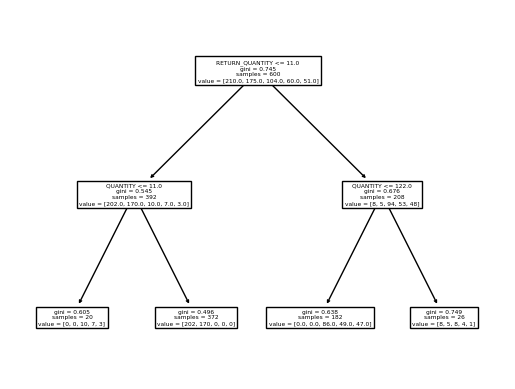

In [19]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree = dtree.fit(x_train, y_train)
tree.plot_tree(dtree, feature_names= x.columns)
plt.show()

**Prediction met x_test**

In [21]:
predicted_df = pd.DataFrame(dtree.predict(x_test))
predicted_df = predicted_df.rename(columns = {0: 'Predicted Reason'})
predicted_df

,Predicted Reason
0,Defective product
1,Defective product
2,Defective product
3,Unsatisfactory product
4,Unsatisfactory product
...,...
101,Defective product
102,Defective product
103,Defective product
104,Defective product


**Prediction vergelijken met y_test**

In [22]:
model_results_frame = pd.concat([y_test.reset_index()['RETURN_DESCRIPTION_EN'], predicted_df],  axis=1)
model_results_frame

,RETURN_DESCRIPTION_EN,Predicted Reason
0,Incomplete product,Defective product
1,Defective product,Defective product
2,Defective product,Defective product
3,Wrong product shipped,Unsatisfactory product
4,Unsatisfactory product,Unsatisfactory product
...,...,...
101,Defective product,Defective product
102,Incomplete product,Defective product
103,Defective product,Defective product
104,Defective product,Defective product


**Confusion matrix**

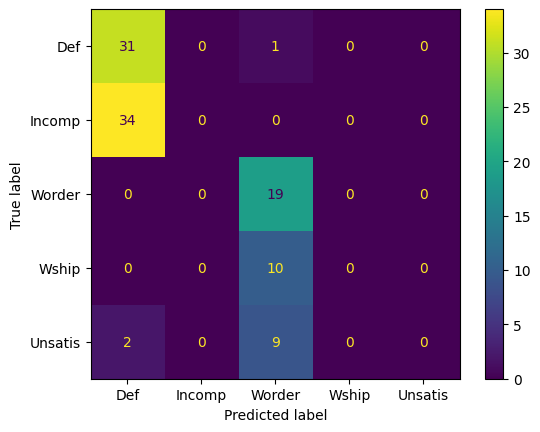

In [30]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['RETURN_DESCRIPTION_EN'], model_results_frame['Predicted Reason'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels= ["Def", "Incomp", "Worder", "Wship", "Unsatis"])

cm_display.plot()
plt.show()

**Accuracy score**

In [31]:
metrics.accuracy_score(model_results_frame['RETURN_DESCRIPTION_EN'], model_results_frame['Predicted Reason'])

0.4716981132075472

## **Max_depth = 3**

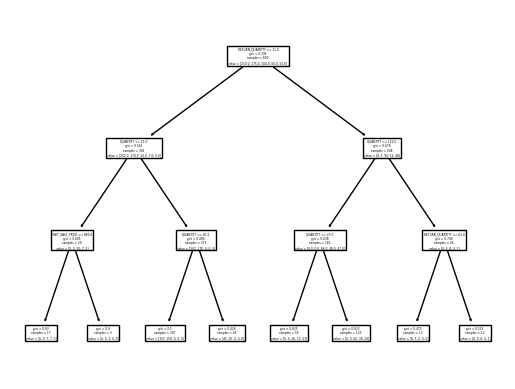

In [32]:
dtree = DecisionTreeClassifier(max_depth=3) 
dtree = dtree.fit(x_train, y_train)
tree.plot_tree(dtree, feature_names= x.columns)
plt.show()

**Prediction met x_test**

In [34]:
predicted_df = pd.DataFrame(dtree.predict(x_test))
predicted_df = predicted_df.rename(columns= {0: 'Predicted Reason'})
predicted_df

,Predicted Reason
0,Defective product
1,Defective product
2,Defective product
3,Unsatisfactory product
4,Unsatisfactory product
...,...
101,Defective product
102,Defective product
103,Defective product
104,Defective product


**Prediction vergelijken met y_test**

In [36]:
model_results_frame = pd.concat([y_test.reset_index()['RETURN_DESCRIPTION_EN'], predicted_df], axis=1)
model_results_frame

,RETURN_DESCRIPTION_EN,Predicted Reason
0,Incomplete product,Defective product
1,Defective product,Defective product
2,Defective product,Defective product
3,Wrong product shipped,Unsatisfactory product
4,Unsatisfactory product,Unsatisfactory product
...,...,...
101,Defective product,Defective product
102,Incomplete product,Defective product
103,Defective product,Defective product
104,Defective product,Defective product


**confusion matrix**

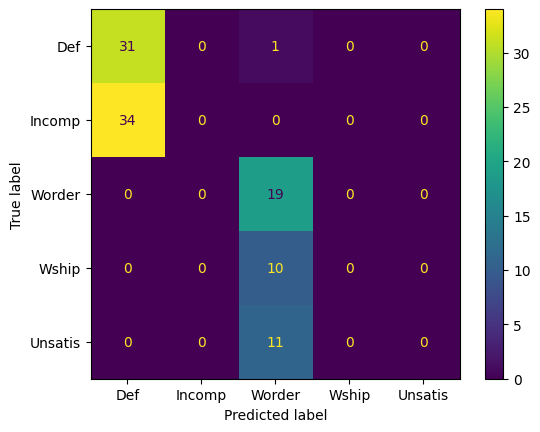

In [37]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['RETURN_DESCRIPTION_EN'], model_results_frame['Predicted Reason'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels= ["Def", "Incomp", "Worder", "Wship", "Unsatis"])

cm_display.plot()
plt.show()

**Accuracy score**

In [38]:
metrics.accuracy_score(model_results_frame['RETURN_DESCRIPTION_EN'], model_results_frame['Predicted Reason'])

0.4716981132075472

**Sensitivity score**

In [48]:
metrics.recall_score(model_results_frame['RETURN_DESCRIPTION_EN'], model_results_frame['Predicted Reason'], average = None)


array([0.5       , 0.47058824, 0.42105263, 0.3       , 0.36363636])

**Specificity score**

## **Geen Max_depth**

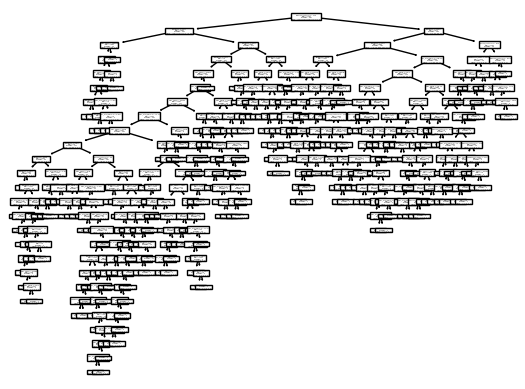

In [39]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
tree.plot_tree(dtree, feature_names= x.columns)
plt.show()

**Evalueren**

In [40]:
predicted_df = pd.DataFrame(dtree.predict(x_test))
predicted_df = predicted_df.rename(columns= {0: 'Predicted Reason'})
model_results_frame = pd.concat([y_test.reset_index()['RETURN_DESCRIPTION_EN'], predicted_df], axis=1)
model_results_frame

,RETURN_DESCRIPTION_EN,Predicted Reason
0,Incomplete product,Defective product
1,Defective product,Defective product
2,Defective product,Incomplete product
3,Wrong product shipped,Unsatisfactory product
4,Unsatisfactory product,Wrong product ordered
...,...,...
101,Defective product,Incomplete product
102,Incomplete product,Incomplete product
103,Defective product,Defective product
104,Defective product,Incomplete product


**Confusion matrix**

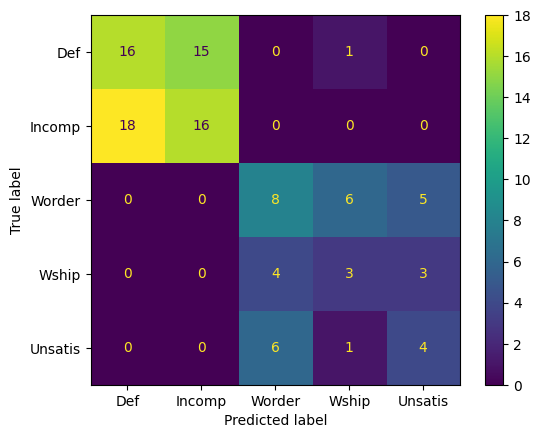

In [41]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['RETURN_DESCRIPTION_EN'], model_results_frame['Predicted Reason'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels= ["Def", "Incomp", "Worder", "Wship", "Unsatis"])

cm_display.plot()
plt.show()

**Accuracy score**

In [42]:
metrics.accuracy_score(model_results_frame['RETURN_DESCRIPTION_EN'], model_results_frame['Predicted Reason'])

0.44339622641509435